# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import sys

import mplsoccer
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)

# Exploring the traits of a Playmaker

## Vision

### Parameters used: <br>

1. Through Balls <br>
2. Key Passes / Shot Assists <br>
3. Assists / Goal Assists

### Data Prep

In [3]:
eventPassDataLaLiga2019 = pd.read_csv("D:\Analytics\Football\MAS - Masterclass\Data\passDataLaLiga2020.csv", low_memory=False)

In [4]:
passRelDataLaLiga2019 = pd.read_csv("D:\Analytics\Football\MAS - Masterclass\Data\passRelDataLaLiga2020.csv", low_memory=False)

In [5]:
eventPassDataLaLiga2019.columns.values

array(['match_id', 'id', 'index', 'period', 'timestamp', 'minute',
       'second', 'possession', 'duration', 'type.id', 'type.name',
       'possession_team.id', 'possession_team.name', 'play_pattern.id',
       'play_pattern.name', 'team.id', 'team.name', 'tactics.formation',
       'tactics.lineup', 'related_events', 'off_camera', 'location',
       'player.id', 'player.name', 'position.id', 'position.name',
       'pass.recipient.id', 'pass.recipient.name', 'pass.length',
       'pass.angle', 'pass.height.id', 'pass.height.name',
       'pass.end_location', 'pass.body_part.id', 'pass.body_part.name',
       'pass.type.id', 'pass.type.name', 'carry.end_location',
       'under_pressure', 'dribble.outcome.id', 'dribble.outcome.name',
       'dribble.nutmeg', 'duel.type.id', 'duel.type.name',
       'duel.outcome.id', 'duel.outcome.name', 'pass.outcome.id',
       'pass.outcome.name', 'ball_receipt.outcome.id',
       'ball_receipt.outcome.name', 'counterpress',
       'ball_recovery.

In [6]:
eventPassDataLaLiga2019.groupby(['player.id']).agg({'player.name':'first',
                                                    'team.name':'first',
                                                    'type.id':'count',
                                                    'pass.through_ball':'sum',
                                                    'pass.shot_assist':'sum',
                                                    'pass.goal_assist':'sum'})\
                                                    .sort_values('pass.through_ball',ascending=False)

,player.name,team.name,type.id,pass.through_ball,pass.shot_assist,pass.goal_assist
player.id,,,,,,
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,2142,96,67,19
5203.0,Sergio Busquets i Burgos,Barcelona,2280,25,16,1
8118.0,Frenkie de Jong,Barcelona,1363,16,17,1
5246.0,Luis Alberto Suárez Díaz,Barcelona,643,14,20,8
6379.0,Sergi Roberto Carnicer,Barcelona,1883,14,23,0
...,...,...,...,...,...,...
6698.0,Marko Dmitrović,Eibar,54,0,0,0
6693.0,Raúl Rodríguez Navas,Osasuna,15,0,1,0
6684.0,Roger Martí Salvador,Levante,24,0,2,0


In [7]:
playerWisedf = eventPassDataLaLiga2019.groupby(['player.id']).agg({'player.name':'first',
                                                    'team.name':'first',
                                                    'type.id':'count',
                                                    'pass.through_ball':'sum',
                                                    'pass.shot_assist':'sum',
                                                    'pass.goal_assist':'sum'})\
                                                    .sort_values('pass.through_ball',ascending=False)

In [8]:
playerMatchMins_df = eventPassDataLaLiga2019.drop_duplicates(subset=['player.id','match_id']).groupby(['player.id'])\
                     .agg({'minsPlayed':'sum'})

In [9]:
playerWisedf = pd.concat([playerWisedf,playerMatchMins_df], axis=1)

In [10]:
playerWisedf

,player.name,team.name,type.id,pass.through_ball,pass.shot_assist,pass.goal_assist,minsPlayed
player.id,,,,,,,
2948.0,Nabil Fekir,Real Betis,17,0,0,0,94.0
3042.0,Mikel Merino Zazón,Real Sociedad,101,2,3,0,190.0
3058.0,Javier Hernández Balcázar,Sevilla,7,0,0,0,29.0
3122.0,Yannis Salibur,Mallorca,7,0,2,0,11.0
3139.0,Chidozie Collins Awaziem,Leganés,19,0,0,0,96.0
...,...,...,...,...,...,...,...
32953.0,Asier Villalibre Molina,Athletic Bilbao,2,0,0,0,27.0
34515.0,Fernando Niño Rodriguez,Villarreal,7,0,0,0,25.0
40881.0,Enrique Pérez Muñoz,Real Valladolid,41,0,1,0,94.0


In [11]:
playerWisedf.rename(columns={'type.id':'totalPasses',
                             'pass.through_ball':'passTB',
                             'pass.shot_assist':'passSA',
                             'pass.goal_assist':'passGA'},inplace=True)

#### Calculating per90 stats

In [12]:
per90Cols = ['totalPasses', 'passTB', 'passSA', 'passGA']

In [13]:
for col in per90Cols:
    playerWisedf[col+'Per90'] = playerWisedf[col].divide(playerWisedf['minsPlayed']).multiply(90)

In [14]:
playerWisedf.head()

,player.name,team.name,totalPasses,passTB,passSA,passGA,minsPlayed,totalPassesPer90,passTBPer90,passSAPer90,passGAPer90
player.id,,,,,,,,,,,
2948.0,Nabil Fekir,Real Betis,17,0,0,0,94.0,16.276596,0.000000,0.000000,0.0
3042.0,Mikel Merino Zazón,Real Sociedad,101,2,3,0,190.0,47.842105,0.947368,1.421053,0.0
3058.0,Javier Hernández Balcázar,Sevilla,7,0,0,0,29.0,21.724138,0.000000,0.000000,0.0
3122.0,Yannis Salibur,Mallorca,7,0,2,0,11.0,57.272727,0.000000,16.363636,0.0
3139.0,Chidozie Collins Awaziem,Leganés,19,0,0,0,96.0,17.812500,0.000000,0.000000,0.0


### Vision Ratings

Using Standardized Weights:

`visionRating = passTBPer90 * 0.2 + passSAPer90 * 0.3 + passGAPer90 * 0.5`

In [15]:
playerWisedf['visionRating'] = (playerWisedf['passTBPer90']*.2).add(playerWisedf['passSAPer90']*.3)\
                                .add(playerWisedf['passGAPer90']*.5)

In [16]:
playerWisedf.loc[playerWisedf['visionRating'].nlargest(10).index,['player.name','team.name','visionRating','minsPlayed']]

,player.name,team.name,visionRating,minsPlayed
player.id,,,,
3122.0,Yannis Salibur,Mallorca,4.909091,11.0
24315.0,Enrique Barja Afonso,Osasuna,2.892857,28.0
30421.0,Matías Ezequiel Vargas Martín,Espanyol,1.909091,33.0
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,1.462051,3004.0
23947.0,Roberto Torres Morales,Osasuna,1.384615,13.0
23981.0,Álvaro Tejero Sacristán,Eibar,1.186813,91.0
11386.0,Santiago Cazorla González,Villarreal,1.167939,131.0
3308.0,Kieran Trippier,Atlético Madrid,1.161290,93.0
5552.0,Marcelo Vieira da Silva Júnior,Real Madrid,1.064516,93.0


In [17]:
playerWiseFiltered_df = playerWisedf[playerWisedf['minsPlayed']>45]

In [18]:
playerWiseFiltered_df.loc[playerWiseFiltered_df['visionRating'].nlargest(10).index,['player.name','team.name','visionRating','minsPlayed']]

,player.name,team.name,visionRating,minsPlayed
player.id,,,,
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,1.462051,3004.0
23981.0,Álvaro Tejero Sacristán,Eibar,1.186813,91.0
11386.0,Santiago Cazorla González,Villarreal,1.167939,131.0
3308.0,Kieran Trippier,Atlético Madrid,1.161290,93.0
5552.0,Marcelo Vieira da Silva Júnior,Real Madrid,1.064516,93.0
6392.0,Íñigo Lekue Martínez,Athletic Bilbao,1.058824,68.0
6685.0,Mikel Oyarzabal Ugarte,Real Sociedad,1.016129,124.0
6583.0,Carlos Soler Barragán,Valencia,0.910112,89.0
12073.0,Pablo Hervías Ruiz,Real Valladolid,0.910112,89.0


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler((1,10))
playerWiseFiltered_df['visionRating'] = scaler.fit_transform(np.array(playerWiseFiltered_df['visionRating']).reshape(-1,1))

<ipython-input-20-fe2435d4f840>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerWiseFiltered_df['visionRating'] = scaler.fit_transform(np.array(playerWiseFiltered_df['visionRating']).reshape(-1,1))


In [21]:
playerWiseFiltered_df.loc[playerWiseFiltered_df['visionRating'].nlargest(10).index,['player.name','team.name','visionRating','minsPlayed']]

,player.name,team.name,visionRating,minsPlayed
player.id,,,,
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,10.000000,3004.0
23981.0,Álvaro Tejero Sacristán,Eibar,8.305711,91.0
11386.0,Santiago Cazorla González,Villarreal,8.189526,131.0
3308.0,Kieran Trippier,Atlético Madrid,8.148599,93.0
5552.0,Marcelo Vieira da Silva Júnior,Real Madrid,7.552882,93.0
6392.0,Íñigo Lekue Martínez,Athletic Bilbao,7.517840,68.0
6685.0,Mikel Oyarzabal Ugarte,Real Sociedad,7.255024,124.0
6583.0,Carlos Soler Barragán,Valencia,6.602413,89.0
12073.0,Pablo Hervías Ruiz,Real Valladolid,6.602413,89.0


## Ball Control

### Parameters used: <br>

1. Carries <br>
2. Dispossessions <br>
3. Dribbles <br>
4. Miscontrols <br>

### Data Prep

In [22]:
eventsDataLaLiga2019 = pd.read_csv("D:\Analytics\Football\MAS - Masterclass\Data\matchwise_events_data_updated.csv", low_memory=False)

In [23]:
eventsDataLaLiga2019[['type.id','type.name']].drop_duplicates()

,type.id,type.name
0,35,Starting XI
2,18,Half Start
4,30,Pass
5,42,Ball Receipt*
8,43,Carry
39,17,Pressure
42,14,Dribble
43,4,Duel
87,22,Foul Committed
88,21,Foul Won


#### Carries

In [24]:
carryDataLaLiga2019 = eventsDataLaLiga2019[eventsDataLaLiga2019['type.id']==43]

In [25]:
carryDataLaLiga2019.groupby(['player.id']).agg({'player.name':'first',
                                                'team.name':'first',
                                                'type.id':'count'})\
                                                    .sort_values('type.id',ascending=False)

,player.name,team.name,type.id
player.id,,,
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,2226
5213.0,Gerard Piqué Bernabéu,Barcelona,1813
5203.0,Sergio Busquets i Burgos,Barcelona,1700
6379.0,Sergi Roberto Carnicer,Barcelona,1556
6826.0,Clément Lenglet,Barcelona,1443
...,...,...,...
5830.0,Kenneth Josiah Omeruo,Leganés,1
6613.0,Rubén Sobrino Pozuelo,Valencia,1
6604.0,Darko Brašanac,Osasuna,1


In [26]:
carryPlayerData = carryDataLaLiga2019.groupby(['player.id']).agg({'player.name':'first',
                                                                  'team.name':'first',
                                                                  'type.id':'count'})

In [27]:
carryPlayerData.rename(columns={'type.id':'totalCarries'},inplace=True)

#### Calculating Carries Per 90 

In [28]:
carryPlayerData = pd.concat([carryPlayerData,playerMatchMins_df],axis=1)

In [29]:
carryPlayerData['totalCarriesPer90'] = carryPlayerData['totalCarries'].divide(carryPlayerData['minsPlayed']).multiply(90)

In [30]:
carryPlayerData.sort_values(by='totalCarriesPer90',ascending=False)

,player.name,team.name,totalCarries,minsPlayed,totalCarriesPer90
player.id,,,,,
11392.0,Arthur Henrique Ramos de Oliveira Melo,Barcelona,847.0,1015.0,75.103448
24949.0,Álex Collado Gutiérrez,Barcelona,8.0,10.0,72.000000
6998.0,Rafael Alcântara do Nascimento,Celta Vigo,28.0,36.0,70.000000
5203.0,Sergio Busquets i Burgos,Barcelona,1700.0,2220.0,68.918919
30421.0,Matías Ezequiel Vargas Martín,Espanyol,25.0,33.0,68.181818
...,...,...,...,...,...
5830.0,Kenneth Josiah Omeruo,Leganés,1.0,82.0,1.097561
3163.0,Mariano Díaz Mejía,Real Madrid,2.0,NaN,NaN
6613.0,Rubén Sobrino Pozuelo,Valencia,1.0,NaN,NaN


#### Dispossessions

In [31]:
dispDataLaLiga2019 = eventsDataLaLiga2019[eventsDataLaLiga2019['type.id']==3]

In [32]:
dispPlayerData = dispDataLaLiga2019.groupby(['player.id']).agg({'player.name':'first',
                                                                  'team.name':'first',
                                                                  'type.id':'count'})

In [33]:
dispPlayerData.rename(columns={'type.id':'totalDisps'},inplace=True)

In [34]:
dispPlayerData

,player.name,team.name,totalDisps
player.id,,,
2948.0,Nabil Fekir,Real Betis,5
3042.0,Mikel Merino Zazón,Real Sociedad,3
3058.0,Javier Hernández Balcázar,Sevilla,1
3139.0,Chidozie Collins Awaziem,Leganés,1
3141.0,André-Frank Zambo Anguissa,Villarreal,2
...,...,...,...
30756.0,Anssumane Fati,Barcelona,19
31090.0,Takefusa Kubo,Mallorca,2
32480.0,Ronald Federico Araújo da Silva,Barcelona,1


#### Calculating Dispossessions per 90

In [35]:
dispPlayerData = pd.merge(dispPlayerData,playerMatchMins_df,how='left',left_index=True,right_index=True)

In [36]:
dispPlayerData['totalDispsPer90'] = dispPlayerData['totalDisps'].divide(dispPlayerData['minsPlayed']).multiply(90)

In [37]:
dispPlayerData.sort_values(by='totalDispsPer90',ascending=False)

,player.name,team.name,totalDisps,minsPlayed,totalDispsPer90
player.id,,,,,
30421.0,Matías Ezequiel Vargas Martín,Espanyol,3,33.0,8.181818
5463.0,Luka Modrić,Real Madrid,2,30.0,6.000000
6711.0,Enrique García Martínez,Eibar,1,15.0,6.000000
22321.0,Ander Barrenetxea Muguruza,Real Sociedad,4,66.0,5.454545
5633.0,Yannick Ferreira Carrasco,Atlético Madrid,5,84.0,5.357143
...,...,...,...,...,...
32480.0,Ronald Federico Araújo da Silva,Barcelona,1,265.0,0.339623
5211.0,Jordi Alba Ramos,Barcelona,6,1910.0,0.282723
5492.0,Samuel Yves Umtiti,Barcelona,3,993.0,0.271903


In [38]:
pd.concat([dispPlayerData,playerMatchMins_df],axis=1)

,player.name,team.name,totalDisps,minsPlayed,totalDispsPer90,minsPlayed
player.id,,,,,,
2948.0,Nabil Fekir,Real Betis,5.0,94.0,4.787234,94.0
3042.0,Mikel Merino Zazón,Real Sociedad,3.0,190.0,1.421053,190.0
3058.0,Javier Hernández Balcázar,Sevilla,1.0,29.0,3.103448,29.0
3122.0,NaN,NaN,NaN,NaN,NaN,11.0
3139.0,Chidozie Collins Awaziem,Leganés,1.0,96.0,0.937500,96.0
...,...,...,...,...,...,...
32953.0,NaN,NaN,NaN,NaN,NaN,27.0
34515.0,NaN,NaN,NaN,NaN,NaN,25.0
40881.0,NaN,NaN,NaN,NaN,NaN,94.0


#### Dribbles

In [39]:
dribbleDataLaLiga2019 = eventsDataLaLiga2019[eventsDataLaLiga2019['type.id']==14]

In [40]:
dribblePlayerData = dribbleDataLaLiga2019.groupby(['player.id']).agg({'player.name':'first',
                                                                      'team.name':'first',
                                                                      'type.id':'count'})

In [41]:
dribblePlayerData.rename(columns={'type.id':'totalDribbles'},inplace=True)

In [42]:
dribblePlayerData.shape

(200, 3)

#### Calculating Dribbles per 90

In [43]:
dribblePlayerData = pd.merge(dribblePlayerData,playerMatchMins_df,how='left',left_index=True,right_index=True)

In [44]:
dribblePlayerData['totalDribblesPer90'] = dribblePlayerData['totalDribbles'].divide(dribblePlayerData['minsPlayed']).multiply(90)

In [45]:
dribblePlayerData.loc[dribblePlayerData['totalDribblesPer90'].nlargest(10).index,
                      ['player.name','team.name','totalDribblesPer90','minsPlayed']]

,player.name,team.name,totalDribblesPer90,minsPlayed
player.id,,,,
6809.0,Erick Cathriel Cabaco Almada,Levante,12.857143,7.0
6828.0,Jaume Vicent Costa Jordá,Valencia,12.000000,15.0
30421.0,Matías Ezequiel Vargas Martín,Espanyol,10.909091,33.0
7154.0,Sebastián Carlos Cristóforo Pepe,Eibar,10.000000,9.0
18395.0,Vinícius José Paixão de Oliveira Júnior,Real Madrid,9.677419,93.0
5477.0,Ousmane Dembélé,Barcelona,9.255319,282.0
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,8.209055,3004.0
40881.0,Enrique Pérez Muñoz,Real Valladolid,7.659574,94.0
32953.0,Asier Villalibre Molina,Athletic Bilbao,6.666667,27.0


#### Miscontrols

In [46]:
miscontrolDataLaLiga2019 = eventsDataLaLiga2019[eventsDataLaLiga2019['type.id']==38]

In [47]:
miscontrolPlayerData = miscontrolDataLaLiga2019.groupby(['player.id']).agg({'player.name':'first',
                                                                            'team.name':'first',
                                                                            'type.id':'count'})

In [48]:
miscontrolPlayerData.rename(columns={'type.id':'totalMiscontrols'},inplace=True)

#### Calculating Miscontrols per 90

In [49]:
miscontrolPlayerData = pd.merge(miscontrolPlayerData,playerMatchMins_df,how='left',left_index=True,right_index=True)

In [50]:
miscontrolPlayerData['totalMiscontrolsPer90'] = miscontrolPlayerData['totalMiscontrols'].divide(miscontrolPlayerData['minsPlayed']).multiply(90)

In [51]:
miscontrolPlayerData.loc[miscontrolPlayerData['totalMiscontrolsPer90'].nsmallest(10).index,['player.name','team.name','totalMiscontrolsPer90','minsPlayed']]

,player.name,team.name,totalMiscontrolsPer90,minsPlayed
player.id,,,,
5213.0,Gerard Piqué Bernabéu,Barcelona,0.262486,2743.0
5492.0,Samuel Yves Umtiti,Barcelona,0.362538,993.0
5211.0,Jordi Alba Ramos,Barcelona,0.376963,1910.0
5203.0,Sergio Busquets i Burgos,Barcelona,0.405405,2220.0
17304.0,Héctor Junior Firpo Adames,Barcelona,0.469239,959.0
8252.0,Martin Ødegaard,Real Sociedad,0.473684,190.0
6821.0,Jesús Navas González,Sevilla,0.478723,188.0
5201.0,Sergio Ramos García,Real Madrid,0.481283,187.0
5539.0,Carlos Henrique Casimiro,Real Madrid,0.481283,187.0


#### Merging all the parameters into a DataFrame

In [52]:
dispPlayerData.drop(columns=['player.name','team.name','minsPlayed'], inplace=True)
dribblePlayerData.drop(columns=['player.name','team.name','minsPlayed'], inplace=True)
miscontrolPlayerData.drop(columns=['player.name','team.name','minsPlayed'], inplace=True)

In [53]:
ballControlData = pd.merge(carryPlayerData,dispPlayerData,how='outer',left_index=True,right_index=True)
ballControlData = pd.merge(ballControlData,dribblePlayerData,how='outer',left_index=True,right_index=True)
ballControlData = pd.merge(ballControlData,miscontrolPlayerData,how='outer',left_index=True,right_index=True)

In [54]:
ballControlData = ballControlData[ballControlData['minsPlayed']>45]

In [55]:
ballControlData

,player.name,team.name,totalCarries,minsPlayed,totalCarriesPer90,totalDisps,totalDispsPer90,totalDribbles,totalDribblesPer90,totalMiscontrols,totalMiscontrolsPer90
player.id,,,,,,,,,,,
2948.0,Nabil Fekir,Real Betis,33.0,94.0,31.595745,5.0,4.787234,2.0,1.914894,1.0,0.957447
3042.0,Mikel Merino Zazón,Real Sociedad,95.0,190.0,45.000000,3.0,1.421053,3.0,1.421053,5.0,2.368421
3139.0,Chidozie Collins Awaziem,Leganés,16.0,96.0,15.000000,1.0,0.937500,1.0,0.937500,1.0,0.937500
3141.0,André-Frank Zambo Anguissa,Villarreal,91.0,188.0,43.563830,2.0,0.957447,5.0,2.393617,3.0,1.436170
3236.0,Sergi Darder Moll,Espanyol,29.0,124.0,21.048387,2.0,1.451613,2.0,1.451613,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32185.0,Alejandro Remiro Gargallo,Real Sociedad,54.0,190.0,25.578947,NaN,NaN,NaN,NaN,NaN,NaN
32480.0,Ronald Federico Araújo da Silva,Barcelona,173.0,265.0,58.754717,1.0,0.339623,1.0,0.339623,NaN,NaN
32670.0,Víctor Gómez Perea,Espanyol,43.0,156.0,24.807692,NaN,NaN,NaN,NaN,NaN,NaN


### Ball Control Ratings

Using Non-Standardized weights: <br>

`bcRating = totalCarriesPer90 * 2 + totalDribblesPer90 * 1 + toalDispsPer90 * -1 + totalMiscontrolsPer90 * -2`

In [56]:
ballControlData['bcRating'] = (ballControlData['totalCarriesPer90']*2).add(ballControlData['totalDribblesPer90']*1)\
                              .add(ballControlData['totalDispsPer90']*-1).add(ballControlData['totalMiscontrolsPer90']*-2)

In [57]:
ballControlData.loc[ballControlData['bcRating'].nlargest(20).index,['player.name','team.name','bcRating','minsPlayed']]

,player.name,team.name,bcRating,minsPlayed
player.id,,,,
11392.0,Arthur Henrique Ramos de Oliveira Melo,Barcelona,148.256158,1015.0
5203.0,Sergio Busquets i Burgos,Barcelona,137.270270,2220.0
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,135.059920,3004.0
6379.0,Sergi Roberto Carnicer,Barcelona,133.479730,2072.0
5477.0,Ousmane Dembélé,Barcelona,130.212766,282.0
24841.0,Ricard Puig Martí,Barcelona,127.582418,546.0
8118.0,Frenkie de Jong,Barcelona,126.416479,1772.0
5470.0,Ivan Rakitić,Barcelona,125.658228,1580.0
5492.0,Samuel Yves Umtiti,Barcelona,123.353474,993.0


In [58]:
ballControlData[['totalCarriesPer90', 'totalDispsPer90','totalDribblesPer90','totalMiscontrolsPer90']] = \
            ballControlData[['totalCarriesPer90', 'totalDispsPer90','totalDribblesPer90','totalMiscontrolsPer90']].fillna(0)

In [59]:
ballControlData['bcRating'] = (ballControlData['totalCarriesPer90']*2).add(ballControlData['totalDribblesPer90']*1)\
                              .add(ballControlData['totalDispsPer90']*-1).add(ballControlData['totalMiscontrolsPer90']*-2)

In [60]:
ballControlData['bcRating'] =\
    scaler.fit_transform(np.array(ballControlData['bcRating']).reshape(-1,1))

In [61]:
ballControlData.loc[ballControlData['bcRating'].nlargest(20).index][['player.name','team.name','bcRating','minsPlayed']]

,player.name,team.name,bcRating,minsPlayed
player.id,,,,
11392.0,Arthur Henrique Ramos de Oliveira Melo,Barcelona,10.000000,1015.0
5203.0,Sergio Busquets i Burgos,Barcelona,9.323071,2220.0
5504.0,Éver Maximiliano David Banega,Sevilla,9.202571,143.0
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,9.186873,3004.0
6379.0,Sergi Roberto Carnicer,Barcelona,9.089505,2072.0
5477.0,Ousmane Dembélé,Barcelona,8.888201,282.0
6676.0,Igor Zubeldía Elorza,Real Sociedad,8.859686,120.0
24841.0,Ricard Puig Martí,Barcelona,8.726124,546.0
8118.0,Frenkie de Jong,Barcelona,8.654281,1772.0


## Creativity

### Parameters used: <br>

1. Carries <br>
2. Dribbles <br>
3. Through Balls <br>
4. Shot Assists / Key Passes <br>
5. Goal Assists

### Data Prep

In [62]:
carryPlayerData.drop(columns={'player.name','team.name','minsPlayed'}, inplace=True)

In [63]:
creativityData = pd.merge(playerWisedf, dribblePlayerData, how='outer', left_index=True, right_index=True)
creativityData = pd.merge(creativityData, carryPlayerData, how='outer', left_index=True, right_index=True)

In [64]:
creativityData = creativityData.fillna(0)

### Creativity Ratings

Using Standardized Weights:

`creativityRating = totalCarriesPer90*0.05 + passTBPer90*0.2 + totalDribblesPer90*0.1 + passSAPer90*0.25 + passGAPer90*0.4`

In [65]:
creativityData['creativityRating'] = (creativityData['totalCarriesPer90']*.05).add(creativityData['passTBPer90']*0.2)\
                                     .add(creativityData['totalDribblesPer90']*0.1).add(creativityData['passSAPer90']*0.25)\
                                     .add(creativityData['passGAPer90']*0.4)

In [66]:
creativityData = creativityData[creativityData['minsPlayed'] > 45]

In [67]:
creativityData['creativityRating'] = scaler.fit_transform(np.array(creativityData['creativityRating']).reshape(-1,1))

In [68]:
creativityData.loc[creativityData['creativityRating'].nlargest(10).index][['player.name','team.name','minsPlayed','creativityRating']]

,player.name,team.name,minsPlayed,creativityRating
player.id,,,,
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,3004.0,10.000000
5477.0,Ousmane Dembélé,Barcelona,282.0,8.826327
5504.0,Éver Maximiliano David Banega,Sevilla,143.0,8.139237
11392.0,Arthur Henrique Ramos de Oliveira Melo,Barcelona,1015.0,7.995213
24841.0,Ricard Puig Martí,Barcelona,546.0,7.797417
5203.0,Sergio Busquets i Burgos,Barcelona,2220.0,7.429204
6379.0,Sergi Roberto Carnicer,Barcelona,2072.0,7.319997
8118.0,Frenkie de Jong,Barcelona,1772.0,7.221513
5470.0,Ivan Rakitić,Barcelona,1580.0,7.021251


## Passing Ability

### Parameters used: <br>

1. Accuracy <br>
2. Ground Pass Accuracy <br>
3. Low Pass Accuracy <br>
4. High Pass Accuracy <br>
5. Miscommunication <br>
6. Under Pressure Accuracy <br>
7. Through Ball Accuracy

### Data Prep

#### Total Passes

In [69]:
totalPassData = eventPassDataLaLiga2019.groupby(['player.id']).agg({'player.name':'first',
                                                                    'team.name':'first',
                                                                    'type.id':'count',
                                                                    'pass.outcome.id':lambda x: (x.isnull()).sum()})

In [70]:
totalPassData

,player.name,team.name,type.id,pass.outcome.id
player.id,,,,
2948.0,Nabil Fekir,Real Betis,17,14.0
3042.0,Mikel Merino Zazón,Real Sociedad,101,89.0
3058.0,Javier Hernández Balcázar,Sevilla,7,5.0
3122.0,Yannis Salibur,Mallorca,7,7.0
3139.0,Chidozie Collins Awaziem,Leganés,19,15.0
...,...,...,...,...
32953.0,Asier Villalibre Molina,Athletic Bilbao,2,2.0
34515.0,Fernando Niño Rodriguez,Villarreal,7,5.0
40881.0,Enrique Pérez Muñoz,Real Valladolid,41,39.0


In [71]:
totalPassData.rename(columns={'type.id':'totalPasses','pass.outcome.id':'succPasses'},inplace=True)

In [72]:
totalPassData['passAccuracy'] = totalPassData['succPasses'].divide(totalPassData['totalPasses'])

##### Accuracy Distribution

In [73]:
[i/100 for i in range(0,101,10)] # Creating Bins

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

<AxesSubplot:>

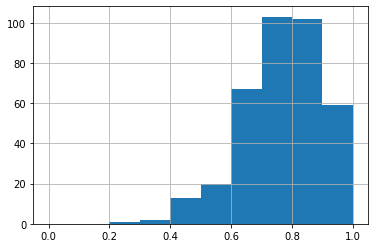

In [74]:
totalPassData['passAccuracy'].hist(bins=[i/100 for i in range(0,101,10)])

#### Ground Passes

In [75]:
gpData = eventPassDataLaLiga2019[eventPassDataLaLiga2019['pass.height.id']==1]

In [76]:
gpPlayerData = gpData.groupby(['player.id']).agg({'type.id':'count','pass.outcome.id':lambda x: (x.isnull()).sum()})

In [77]:
gpPlayerData.rename(columns={'type.id':'totalGPasses','pass.outcome.id':'succGPasses'},inplace=True)

In [78]:
gpPlayerData['gpAccuracy'] = gpPlayerData['succGPasses'].divide(gpPlayerData['totalGPasses'])

##### Accuracy Distribution

<AxesSubplot:>

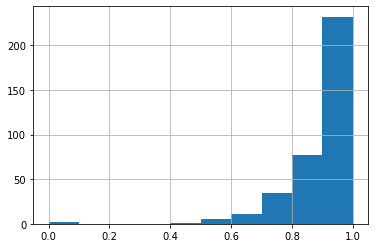

In [79]:
gpPlayerData['gpAccuracy'].hist(bins=[i/100 for i in range(0,101,10)])

#### Low Passes

In [80]:
lpData = eventPassDataLaLiga2019[eventPassDataLaLiga2019['pass.height.id']==2]

In [81]:
lpPlayerData = lpData.groupby(['player.id']).agg({'type.id':'count','pass.outcome.id':lambda x: (x.isnull()).sum()})

In [82]:
lpPlayerData.rename(columns={'type.id':'totalLPasses','pass.outcome.id':'succLPasses'},inplace=True)

In [83]:
lpPlayerData['lpAccuracy'] = lpPlayerData['succLPasses'].divide(lpPlayerData['totalLPasses'])

##### Accuracy Distribution

<AxesSubplot:>

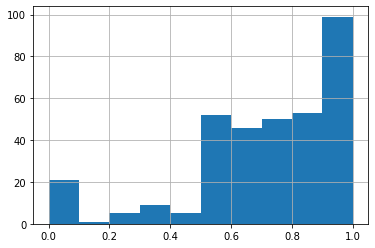

In [84]:
lpPlayerData['lpAccuracy'].hist(bins=[i/100 for i in range(0,101,10)])

#### High Passes

In [85]:
hpData = eventPassDataLaLiga2019[eventPassDataLaLiga2019['pass.height.id']==3]

In [86]:
hpPlayerData = hpData.groupby(['player.id']).agg({'type.id':'count','pass.outcome.id':lambda x: (x.isnull()).sum()})

In [87]:
hpPlayerData.rename(columns={'type.id':'totalHPasses','pass.outcome.id':'succHPasses'},inplace=True)

In [88]:
hpPlayerData['hpAccuracy'] = hpPlayerData['succHPasses'].divide(hpPlayerData['totalHPasses'])

##### Accuracy Distribution

<AxesSubplot:>

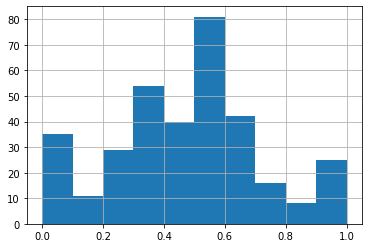

In [89]:
hpPlayerData['hpAccuracy'].hist(bins=[i/100 for i in range(0,101,10)])

#### Under Pressure

In [90]:
upData = eventPassDataLaLiga2019[eventPassDataLaLiga2019['under_pressure'].notnull()]

In [91]:
upPlayerData = upData.groupby(['player.id']).agg({'type.id':'count','pass.outcome.id':lambda x: (x.isnull()).sum()})

In [92]:
upPlayerData.rename(columns={'type.id':'totalPassesUP','pass.outcome.id':'succPassesUP'},inplace=True)

In [93]:
upPlayerData['upAccuracy'] = upPlayerData['succPassesUP'].divide(upPlayerData['totalPassesUP'])

##### Accuracy Distribution

<AxesSubplot:>

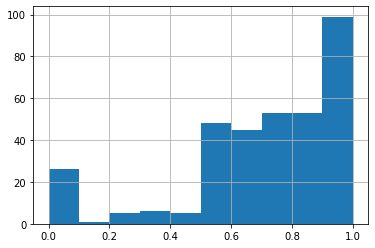

In [94]:
upPlayerData['upAccuracy'].hist(bins=[i/100 for i in range(0,101,10)])

#### Through Balls

In [95]:
tbData = eventPassDataLaLiga2019[eventPassDataLaLiga2019['pass.through_ball'].notnull()]

In [96]:
tbPlayerData = tbData.groupby(['player.id']).agg({'type.id':'count','pass.outcome.id':lambda x: (x.isnull()).sum()})

In [97]:
tbPlayerData.rename(columns={'type.id':'totalPassesTB','pass.outcome.id':'succPassesTB'},inplace=True)

In [98]:
tbPlayerData['tbAccuracy'] = tbPlayerData['succPassesTB'].divide(tbPlayerData['totalPassesTB'])

##### Accuracy Distribution

<AxesSubplot:>

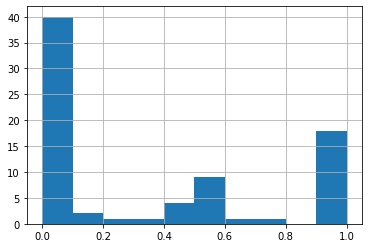

In [99]:
tbPlayerData['tbAccuracy'].hist(bins=[i/100 for i in range(0,101,10)])

#### Miscommunications

In [100]:
eventPassDataLaLiga2019[eventPassDataLaLiga2019['pass.miscommunication'].notnull()]

,match_id,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,off_camera,location,player.id,player.name,position.id,...,goalkeeper.punched_out,shot.saved_off_target,goalkeeper.shot_saved_off_target,dribble.no_touch,goalkeeper.success_in_play,goalkeeper.lost_in_play,match_date,kick_off,home_score,away_score,home_team.home_team_id,home_team.home_team_name,away_team.away_team_id,away_team.away_team_name,jersey_number,started,subID,minMinute,maxMinute,maxMinsMatch,minsPlayed,startX,startY,endX,endY
2592,303516,60eef54b-abe6-4260-9b20-cb91d23df8f5,1003,1,26:00.8,26,0,55,0.781653,30,Pass,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,"['4099d7ab-630e-4bfa-8e86-ffa1c075109c', '4c4f...",NaN,"[33.5, 71.3]",5503.0,Lionel Andrés Messi Cuccittini,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6/27/2020,00:00.0,2,2,209,Celta Vigo,217,Barcelona,10.0,Yes,NaN,0.0,95.0,95,95.0,33.5,71.3,37.5,75.2
3663,303680,56426033-fade-44e3-8bd6-0f4780daab48,1160,1,27:19.8,27,19,47,5.688899,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,"['1b73e573-bb84-4d8d-a137-df2094a50bc5', 'd438...",NaN,"[70.6, 32.3]",24841.0,Ricard Puig Martí,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7/11/2020,30:00.0,0,1,901,Real Valladolid,217,Barcelona,28.0,Yes,NaN,0.0,56.0,94,56.0,70.6,32.3,118.3,12.1
4371,303680,144f3d09-2468-417f-8a43-8c9ab976c062,3593,2,40:05.5,85,5,179,1.732572,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,"['34f499dc-0487-4144-b7d7-586b3d5c358b', 'c700...",NaN,"[60.9, 2.0]",5211.0,Jordi Alba Ramos,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7/11/2020,30:00.0,0,1,901,Real Valladolid,217,Barcelona,18.0,Yes,NaN,0.0,94.0,94,94.0,60.9,2.0,79.0,10.7
6631,303400,c5570869-67f7-48b8-9378-8b3fe1b925b1,3134,2,19:40.4,64,40,126,1.592599,30,Pass,207,Valencia,1,Regular Play,217,Barcelona,NaN,NaN,['9260576a-714f-4728-a097-815476170615'],NaN,"[80.3, 59.2]",8118.0,Frenkie de Jong,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1/25/2020,00:00.0,2,0,207,Valencia,217,Barcelona,21.0,Yes,NaN,0.0,84.0,94,84.0,80.3,59.2,72.4,58.5
7454,303634,69f7fecc-901a-4c21-a8ca-1bf880a9b5ed,1840,1,47:05.4,47,5,103,0.854046,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,"['9f34f510-7c75-47ac-a0d6-9a772de2da3d', 'f153...",NaN,"[92.3, 24.1]",17304.0,Héctor Junior Firpo Adames,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7/16/2020,00:00.0,1,2,217,Barcelona,422,Osasuna,24.0,Yes,NaN,0.0,77.0,97,77.0,92.3,24.1,90.0,38.9
11809,303664,162da578-6436-472c-9a10-050d8f6a1c0d,1670,1,39:26.5,39,26,67,4.403959,30,Pass,217,Barcelona,1,Regular Play,210,Real Sociedad,NaN,NaN,"['79d6389d-c300-4078-99c1-c21a51ca09a4', 'b4cd...",NaN,"[15.2, 40.2]",6676.0,Igor Zubeldía Elorza,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,12/14/2019,00:00.0,2,2,210,Real Sociedad,217,Barcelona,5.0,Yes,NaN,0.0,93.0,93,93.0,15.2,40.2,9.0,76.1
12173,303664,de8af206-3fb8-469a-af0a-d35151d013da,2968,2,22:59.5,67,59,115,0.970464,30,Pass,210,Real Sociedad,4,From Throw In,217,Barcelona,NaN,NaN,"['a603a6d8-d66a-41bf-817d-4460e92a60f3', 'e84d...",NaN,"[79.8, 63.1]",8118.0,Frenkie de Jong,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,12/14/2019,00:00.0,2,2,210,Real Sociedad,217,Barcelona,21.0,Yes,NaN,0.0,93.0,93,93.0,79.8,63.1,83.7,65.8
13774,303487,75e1b061-4b6a-4538-92e1-525cae449d72,490,1,09:40.2,9,40,26,2.530042,30,Pass,217,Barcelona,1,Regular Play,209,Celta Vigo,NaN,NaN,"['79b74aac-5271-49c1-b5af-c9159befc06b', 'fe71...",NaN,"[73.5, 25.2]",4558.0,Pape Cheikh Diop Gueye,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11/9/2019,00:00.0,4,1,217,Barcelona,209,Celta Vigo,24.0,Yes,NaN,0.0,80.0,92,80.0,73.5,25.2,87.7,35.2
14371,303487,4c5d77a6-be8e-4433-ac75-6d788e864fd0,2544,2,12:52.7,57,52,117,2.001677,30,Pass,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,"['d8adb6d8-6cb5-41aa-add6-42baa26210d4', 'eaa0...",NaN,"[84.4, 53.7]",5477.0,Ousmane Dembélé,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11/9/2019,00:00.0,4,1,217,Barcelona,209,Celta Vigo,NaN,NaN,54

In [101]:
len(eventPassDataLaLiga2019[eventPassDataLaLiga2019['pass.miscommunication'].notnull()])/len(eventPassDataLaLiga2019)

0.0005920822456064806

NOTE: <br>
We are ignoring the Miscommunication parameter since there is no enough data. <br>
Only 0.06% of passes where a miscommunication happened.

#### Merging all the parameters into a DataFrame

In [102]:
passingAbilityData = pd.merge(totalPassData,gpPlayerData,how='outer',left_index=True,right_index=True)
passingAbilityData = pd.merge(passingAbilityData,lpPlayerData,how='outer',left_index=True,right_index=True)
passingAbilityData = pd.merge(passingAbilityData,hpPlayerData,how='outer',left_index=True,right_index=True)
passingAbilityData = pd.merge(passingAbilityData,upPlayerData,how='outer',left_index=True,right_index=True)
passingAbilityData = pd.merge(passingAbilityData,tbPlayerData,how='outer',left_index=True,right_index=True)

In [103]:
passingAbilityData.columns

Index(['player.name', 'team.name', 'totalPasses', 'succPasses', 'passAccuracy',
       'totalGPasses', 'succGPasses', 'gpAccuracy', 'totalLPasses',
       'succLPasses', 'lpAccuracy', 'totalHPasses', 'succHPasses',
       'hpAccuracy', 'totalPassesUP', 'succPassesUP', 'upAccuracy',
       'totalPassesTB', 'succPassesTB', 'tbAccuracy'],
      dtype='object')

### Passing Ability Ratings

Using Standardized Weights:

`paRating = passAccuracy*.08 + gpAccuracy*.02 + lpAccuracy*.1 + hpAccuracy*.15 + upAccuracy*.25 + tbAccuracy*.4`

In [104]:
passingAbilityData['paRating'] = (passingAbilityData['passAccuracy']*.08).add(passingAbilityData['gpAccuracy']*.02)\
                                 .add(passingAbilityData['lpAccuracy']*.1).add(passingAbilityData['hpAccuracy']*.15)\
                                 .add(passingAbilityData['upAccuracy']*.25).add(passingAbilityData['tbAccuracy']*.4)

In [105]:
passingAbilityData = pd.concat([passingAbilityData,playerMatchMins_df],axis=1)

In [106]:
passingAbilityData = passingAbilityData[passingAbilityData['minsPlayed'] > 45]

In [107]:
passingAbilityData.loc[passingAbilityData['paRating'].nlargest(10).index][['player.name','team.name','paRating','minsPlayed']]

,player.name,team.name,paRating,minsPlayed
player.id,,,,
5504.0,Éver Maximiliano David Banega,Sevilla,0.923488,143.0
6713.0,Diego Javier Llorente Ríos,Real Sociedad,0.886405,163.0
6866.0,Marc Roca Junqué,Espanyol,0.870504,179.0
5217.0,Iago Aspas Juncal,Celta Vigo,0.869558,187.0
5213.0,Gerard Piqué Bernabéu,Barcelona,0.864449,2743.0
5574.0,Toni Kroos,Real Madrid,0.857502,187.0
8819.0,Alexander Isak,Real Sociedad,0.830492,146.0
8252.0,Martin Ødegaard,Real Sociedad,0.830383,190.0
6705.0,José Ángel Valdés Díaz,Eibar,0.815031,184.0


In [109]:
passingAbilityData = passingAbilityData.fillna(0)

In [110]:
passingAbilityData['paRating'] = scaler.fit_transform(np.array(passingAbilityData['paRating']).reshape(-1,1))

In [111]:
passingAbilityData.loc[passingAbilityData['paRating'].nlargest(10).index][['player.name','team.name','paRating','minsPlayed']]

,player.name,team.name,paRating,minsPlayed
player.id,,,,
5504.0,Éver Maximiliano David Banega,Sevilla,10.000000,143.0
6713.0,Diego Javier Llorente Ríos,Real Sociedad,9.638601,163.0
6866.0,Marc Roca Junqué,Espanyol,9.483641,179.0
5217.0,Iago Aspas Juncal,Celta Vigo,9.474419,187.0
5213.0,Gerard Piqué Bernabéu,Barcelona,9.424628,2743.0
5574.0,Toni Kroos,Real Madrid,9.356924,187.0
8819.0,Alexander Isak,Real Sociedad,9.093695,146.0
8252.0,Martin Ødegaard,Real Sociedad,9.092627,190.0
6705.0,José Ángel Valdés Díaz,Eibar,8.943018,184.0


# Playmaker Rating

In [123]:
playMakerData = pd.merge(playerWisedf[['player.name','team.name','minsPlayed','visionRating']],
                         ballControlData['bcRating'],
                         how='outer',
                         left_index=True, right_index=True)

playMakerData = pd.merge(playMakerData,
                         creativityData['creativityRating'],
                         how='outer',
                         left_index=True, right_index=True)

playMakerData = pd.merge(playMakerData,
                         passingAbilityData['paRating'],
                         how='outer',
                         left_index=True, right_index=True)

In [129]:
playMakerData['playMakerRating'] = playMakerData[['visionRating','bcRating','creativityRating','paRating']].mean(axis=1)

In [130]:
playMakerData.loc[playMakerData['playMakerRating'].nlargest(10).index][['player.name','team.name','minsPlayed','playMakerRating']]

,player.name,team.name,minsPlayed,playMakerRating
player.id,,,,
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,3004.0,8.972437
5504.0,Éver Maximiliano David Banega,Sevilla,143.0,8.441436
24841.0,Ricard Puig Martí,Barcelona,546.0,7.323793
5574.0,Toni Kroos,Real Madrid,187.0,7.305953
8252.0,Martin Ødegaard,Real Sociedad,190.0,7.245690
6379.0,Sergi Roberto Carnicer,Barcelona,2072.0,7.168298
5477.0,Ousmane Dembélé,Barcelona,282.0,7.032851
5203.0,Sergio Busquets i Burgos,Barcelona,2220.0,7.014937
8118.0,Frenkie de Jong,Barcelona,1772.0,6.809023


Using Standardized Weights:

`playMakerRating = visionRating*.4 + bcRating*.2 + creativityRating*.3 + paRating*.1`

In [131]:
playMakerData['playMakerRating'] = (playMakerData['visionRating']*.4).add(playMakerData['bcRating']*.2)\
                                   .add(playMakerData['creativityRating']*.3).add(playMakerData['paRating']*.1)

In [132]:
playMakerData.loc[playMakerData['playMakerRating'].nlargest(10).index][['player.name','team.name','minsPlayed','playMakerRating']]

,player.name,team.name,minsPlayed,playMakerRating
player.id,,,,
5503.0,Lionel Andrés Messi Cuccittini,Barcelona,3004.0,9.507662
5504.0,Éver Maximiliano David Banega,Sevilla,143.0,7.851860
5477.0,Ousmane Dembélé,Barcelona,282.0,7.063860
24841.0,Ricard Puig Martí,Barcelona,546.0,7.061874
5552.0,Marcelo Vieira da Silva Júnior,Real Madrid,93.0,6.857576
8252.0,Martin Ødegaard,Real Sociedad,190.0,6.749239
5574.0,Toni Kroos,Real Madrid,187.0,6.724951
11386.0,Santiago Cazorla González,Villarreal,131.0,6.543576
6685.0,Mikel Oyarzabal Ugarte,Real Sociedad,124.0,6.349575
